In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/face-mask-dataset.zip', 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
!ls


data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [ ]:
print(f"num of with mask images: {len(with_mask_files)}")
print(f"num of without mask images: {len(without_mask_files)}")

num of with mask images: 3725
num of without mask images: 3828


In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

len(labels)

7553

In [ ]:
with_mask_files[0]

'with_mask_9.jpg'

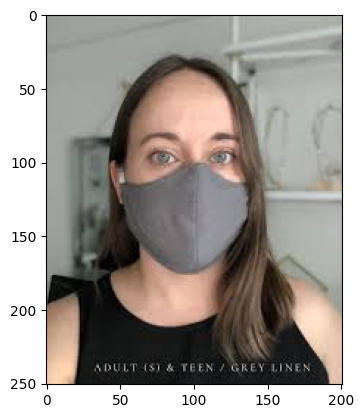

In [ ]:
img = mpimg.imread(f'/content/data/with_mask/{with_mask_files[400]}')
plt.imshow(img)
plt.show()

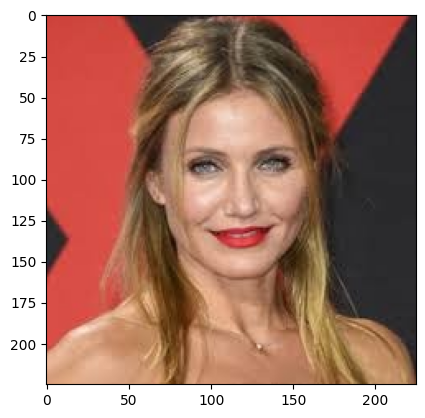

In [ ]:
img = mpimg.imread(f'/content/data/without_mask/{without_mask_files[400]}')
plt.imshow(img)
plt.show()

In [ ]:
with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'

data = []

In [ ]:
for img_file in with_mask_files:
  img = Image.open(with_mask_path + img_file)
  img = img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)


for img_file in without_mask_files:
  img = Image.open(without_mask_path + img_file)
  img = img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(len(data))
print(len(labels))

7553
7553


In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.14509804, 0.09411765, 0.12156863],
        [0.14509804, 0.09411765, 0.12156863],
        [0.14901961, 0.09803922, 0.1254902 ],
        ...,
        [0.14901961, 0.09803922, 0.1254902 ],
        [0.14901961, 0.09803922, 0.1254902 ],
        [0.14901961, 0.09803922, 0.1254902 ]],

       [[0.14509804, 0.09411765, 0.12156863],
        [0.14509804, 0.09411765, 0.12156863],
        [0.14901961, 0.09803922, 0.1254902 ],
        ...,
        [0.14901961, 0.09803922, 0.1254902 ],
        [0.14901961, 0.09803922, 0.1254902 ],
        [0.14901961, 0.09803922, 0.1254902 ]],

       [[0.14509804, 0.09411765, 0.12156863],
        [0.14509804, 0.09411765, 0.12156863],
        [0.14901961, 0.09803922, 0.1254902 ],
        ...,
        [0.14901961, 0.09803922, 0.1254902 ],
        [0.14901961, 0.09803922, 0.1254902 ],
        [0.14901961, 0.09803922, 0.1254902 ]],

       ...,

       [[0.36862745, 0.33333333, 0.3372549 ],
        [0.34117647, 0.30588235, 0.30980392],
        [0.35686275, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 26ms/step - loss: 0.4221 - accuracy: 0.8174 - val_loss: 0.3079 - val_accuracy: 0.8512
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2524 - accuracy: 0.8996 - val_loss: 0.2575 - val_accuracy: 0.8826
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2006 - accuracy: 0.9209 - val_loss: 0.2200 - val_accuracy: 0.9091
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1637 - accuracy: 0.9417 - val_loss: 0.1946 - val_accuracy: 0.9190
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1317 - accuracy: 0.9492 - val_loss: 0.1908 - val_accuracy: 0.9124


In [ ]:
loss , accuracy = model.evaluate(x_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2024 - accuracy: 0.9252
Test Loss: 0.2024364322423935
Test Accuracy: 0.9252150654792786


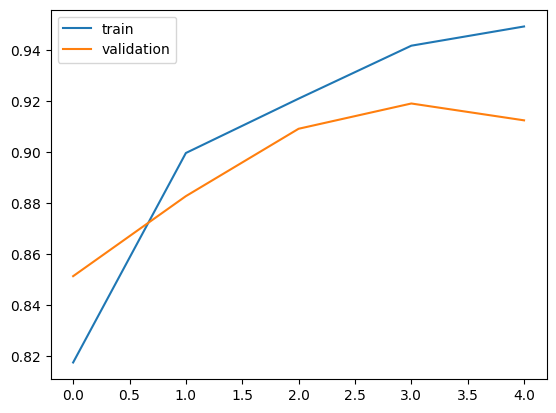

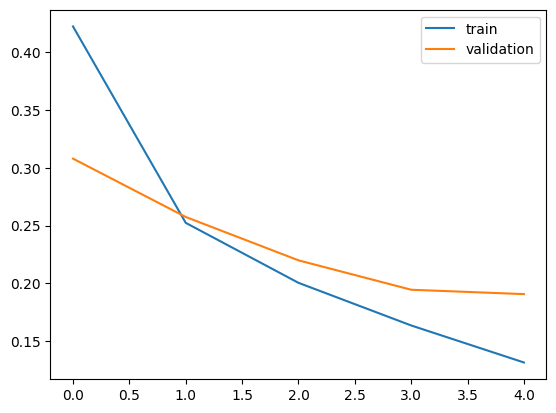

In [ ]:
plt.plot(history.history['accuracy'] , label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'] , label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

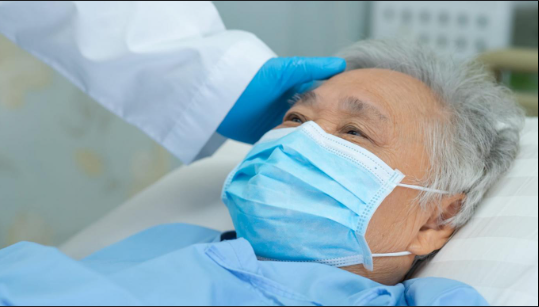

1/1 [==============================] - 0s 349ms/step
[[0.50567585 0.3705525 ]]
The person in the image is wearing a mask


In [ ]:
input_image = cv2.imread("/content/Screenshot 2024-07-27 120544.png")
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

if input_prediction[0][0] > input_prediction[0][1]:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")

In [ ]:
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
